In [1]:
import numpy as np

# 4 NumPy Basics: Arrays and Vectorized Computation

One of the reasons NumPy is so important for numerical computations in Python is because it is designed for efficiency on large arrays of data. There are a number of reasons for this:

* NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects. NumPy’s library of algorithms written in the C lan‐ guage can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in Python sequences.


* NumPy operations perform complex computations on entire arrays without the need for Python for loops.

To give you an idea of the performance difference, consider a NumPy array of one million integers, and the equivalent Python list:

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)

In [3]:
my_list = list(range(1000000))

In [5]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 25.2 ms, sys: 15.4 ms, total: 40.6 ms
Wall time: 47.1 ms


In [6]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 759 ms, sys: 184 ms, total: 944 ms
Wall time: 967 ms


NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

## 4.1 The NumPy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements.

<b>To give you a flavor of how NumPy enables batch computations with similar syntax to scalar values on built-in Python objects, I first import NumPy and generate a small array of random data:

In [7]:
import numpy as np

In [8]:
data = np.random.randn(2, 3)

In [9]:
data

array([[ 0.59055361, -0.01473664,  0.11025476],
       [ 1.10394016, -1.01167162,  0.38683953]])

<b>Then write mathematical operations with data:

In [10]:
data * 10

array([[  5.90553608,  -0.14736635,   1.10254756],
       [ 11.03940161, -10.11671625,   3.86839527]])

In [11]:
data + data

array([[ 1.18110722, -0.02947327,  0.22050951],
       [ 2.20788032, -2.02334325,  0.77367905]])

<b>In the first example, all of the elements have been multiplied by 10. In the second, the corresponding values in each “cell” in the array have been added to each other.

An ndarray is a generic multidimensional container for homogeneous data; that is, all of the elements must be the same type. Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array:

In [12]:
data.shape

(2, 3)

In [13]:
data.dtype

dtype('float64')

## Creating ndarrays

<b>The easiest way to create an array is to use the array function.

In [14]:
data1 = [6, 7.5, 8, 0, 1]

In [15]:
arr1 = np.array(data1)

In [16]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

<b>Nested sequences, like a list of equal-length lists, will be converted into a multidimen‐ sional array:

In [17]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [18]:
arr2 = np.array(data2)

In [19]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array arr2 has two dimensions with shape inferred from the data. We can confirm this by inspecting the ndim and shape attributes:

In [20]:
arr2.ndim

2

In [21]:
arr2.shape

(2, 4)

Unless explicitly specified, np.array tries to infer a good data type for the array that it creates. The data type is stored in a special dtype metadata object; for example, in the previous two examples we have:

In [22]:
arr1.dtype

dtype('float64')

In [23]:
arr2.dtype

dtype('int64')

In addition to np.array, there are a number of other functions for creating new arrays. As examples, zeros and ones create arrays of 0s or 1s, respectively, with a given length or shape. empty creates an array without initializing its values to any par‐ ticular value. To create a higher dimensional array with these methods, pass a tuple for the shape:

In [24]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [26]:
np.empty((2, 3, 2))

array([[[2.00000000e+000, 1.29074003e-231],
        [3.95252517e-323, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

In [27]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## Data Types for ndarrays

In [28]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [29]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [30]:
arr1.dtype

dtype('float64')

In [31]:
arr2.dtype

dtype('int32')

<b>You can explicitly convert or cast an array from one dtype to another using ndarray’s astype method:

In [32]:
arr = np.array([1, 2, 3, 4, 5])

In [33]:
arr.dtype

dtype('int64')

In [34]:
float_arr = arr.astype(np.float64)

In [35]:
float_arr.dtype

dtype('float64')

<b>In this example, integers were cast to floating point. If I cast some floating-point numbers to be of integer dtype, the decimal part will be truncated:

In [36]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [37]:
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [38]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

<b>If you have an array of strings representing numbers, you can use astype to convert
them to numeric form:

In [39]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [40]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

<b>You can also use another array’s dtype attribute:

In [41]:
int_array = np.arange(10)

In [42]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [43]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

<b>There are shorthand type code strings you can also use to refer to a dtype:

In [45]:
empty_uint32 = np.empty(8, dtype='u4')

In [48]:
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

* Calling astype always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype.

## Arithmetic with NumPy Arrays

<b>Arrays are important because they enable you to express batch operations on data without writing any for loops. NumPy users call this vectorization. Any arithmetic operations between equal-size arrays applies the operation element-wise:

In [52]:
arr = np.array([[1.,2.,3.], [4.,5.,6.]])

In [53]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [54]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [55]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

<b>Arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [56]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [57]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

<b>Comparisons between arrays of the same size yield boolean arrays:

In [58]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [59]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [60]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## Basic Indexing and Slicing

In [61]:
arr = np.arange(10)

In [62]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
arr[5]

5

In [64]:
arr[5:8]

array([5, 6, 7])

In [65]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

As you can see, if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is propagated (or broadcasted henceforth) to the entire selection. An important first dis‐ tinction from Python’s built-in lists is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array.

In [66]:
arr_slice = arr[5:8]

In [67]:
arr_slice

array([5, 6, 7])

<b>Now, when I change values in arr_slice, the mutations are reflected in the original array arr:

In [69]:
arr_slice[1] = 12345

In [70]:
arr

array([    0,     1,     2,     3,     4,     5, 12345,     7,     8,
           9])

<b>The “bare” slice [:] will assign to all values in an array:

In [71]:
arr_slice[:] = 64

In [72]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

<b>With higher dimensional arrays, you have many more options. In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays:

In [73]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [74]:
arr2d[2]

array([7, 8, 9])

In [75]:
arr2d[0][2]

3

In [76]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [77]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

<b>arr3d[0] is a 2 × 3 array:

In [78]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

<b>Both scalar values and arrays can be assigned to arr3d[0]:

In [79]:
old_values = arr3d[0].copy()

In [80]:
arr3d[0] = 42

In [81]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [82]:
arr3d[0] = old_values

In [83]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

<b>Similarly, arr3d[1, 0] gives you all of the values whose indices start with (1, 0),
forming a 1-dimensional array:

In [84]:
arr3d[1, 0]

array([7, 8, 9])

<b>This expression is the same as though we had indexed in two steps:

In [85]:
x = arr3d[1]

In [86]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [87]:
x[0]

array([7, 8, 9])

## Indexing with slices

<b>Like one-dimensional objects such as Python lists, ndarrays can be sliced with the familiar syntax:

In [88]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

<b>Consider the two-dimensional array from before, arr2d. Slicing this array is a bit different:

In [89]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [90]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

<b>You can pass multiple slices just like you can pass multiple indexes:

In [91]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

<b>When slicing like this, you always obtain array views of the same number of dimensions. By mixing integer indexes and slices, you get lower dimensional slices.

In [95]:
arr2d[1, :2]

array([4, 5])

In [96]:
arr2d[:2,2]

array([3, 6])

In [97]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

In [98]:
arr2d[:2, 1:] = 0

In [99]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## Boolean Indexing

In [114]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [115]:
data = np.random.randn(7,4)

In [116]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [117]:
data

array([[-0.97021831, -0.47834603, -0.29984588, -0.07791196],
       [-2.57926121, -0.31225694, -0.74851638,  1.10186048],
       [-0.95189413,  0.56015005,  0.07580671,  0.79067415],
       [-0.15561284, -0.23534573,  1.19814486,  0.52455521],
       [-0.30192072,  0.56916127, -1.2014923 , -0.47335005],
       [-1.87285988, -0.32306263, -1.31150185,  1.69826139],
       [-0.63130189,  1.26133042, -2.71249664,  1.40010792]])

In [118]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [119]:
data[names == 'Bob']

array([[-0.97021831, -0.47834603, -0.29984588, -0.07791196],
       [-0.15561284, -0.23534573,  1.19814486,  0.52455521]])

In [120]:
data[names == 'Bob', 2:]

array([[-0.29984588, -0.07791196],
       [ 1.19814486,  0.52455521]])

In [121]:
data[names == 'Bob', 3]

array([-0.07791196,  0.52455521])

In [122]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [123]:
data[~(names == 'Bob')]

array([[-2.57926121, -0.31225694, -0.74851638,  1.10186048],
       [-0.95189413,  0.56015005,  0.07580671,  0.79067415],
       [-0.30192072,  0.56916127, -1.2014923 , -0.47335005],
       [-1.87285988, -0.32306263, -1.31150185,  1.69826139],
       [-0.63130189,  1.26133042, -2.71249664,  1.40010792]])

In [124]:
cond = names == 'Bob'

In [125]:
data[~cond]

array([[-2.57926121, -0.31225694, -0.74851638,  1.10186048],
       [-0.95189413,  0.56015005,  0.07580671,  0.79067415],
       [-0.30192072,  0.56916127, -1.2014923 , -0.47335005],
       [-1.87285988, -0.32306263, -1.31150185,  1.69826139],
       [-0.63130189,  1.26133042, -2.71249664,  1.40010792]])

In [126]:
mask = (names == 'Bob') | (names == 'Will')

In [127]:
mask

array([ True, False,  True,  True,  True, False, False])

In [128]:
data[mask]

array([[-0.97021831, -0.47834603, -0.29984588, -0.07791196],
       [-0.95189413,  0.56015005,  0.07580671,  0.79067415],
       [-0.15561284, -0.23534573,  1.19814486,  0.52455521],
       [-0.30192072,  0.56916127, -1.2014923 , -0.47335005]])

In [129]:
data[data < 0] = 0

In [130]:
data

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.10186048],
       [0.        , 0.56015005, 0.07580671, 0.79067415],
       [0.        , 0.        , 1.19814486, 0.52455521],
       [0.        , 0.56916127, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.69826139],
       [0.        , 1.26133042, 0.        , 1.40010792]])

In [131]:
data[names != 'Joe'] = 7

## Fancy Indexing

<b>Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays. Suppose we had an 8 × 4 array:

In [132]:
arr = np.empty((8,4))

In [133]:
for i in range(8):
    arr[i] = i

In [134]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [135]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [136]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [137]:
arr = np.arange(32).reshape((8,4))

In [138]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [139]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the under‐ lying data without copying anything. Arrays have the transpose method and also the special T attribute:

In [140]:
arr = np.arange(15).reshape((3,5))

In [141]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [142]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you may do this very often—for example, when computing the inner matrix product using np.dot:

In [143]:
arr = np.random.randn(6,3)

In [144]:
arr

array([[ 0.08631211, -0.35326525,  0.5001174 ],
       [ 0.47375671,  1.38610836,  0.87921714],
       [ 2.12903909, -0.82504707, -1.94834317],
       [ 0.97399259, -0.10133224, -1.00091466],
       [-2.7788188 , -0.57701134, -0.49571307],
       [-0.36188773,  0.91544101,  1.42409333]])

In [145]:
np.dot(arr.T, arr)

array([[13.56616083,  0.04305583, -3.8011461 ],
       [ 0.04305583,  3.90803794,  4.34062138],
       [-3.8011461 ,  4.34062138,  8.0947847 ]])

For higher dimensional arrays, transpose will accept a tuple of axis numbers to per‐ mute the axes (for extra mind bending):

In [146]:
arr = np.arange(16).reshape((2,2,4))

In [147]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [148]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Simple transposing with .T is a special case of swapping axes. ndarray has the method swapaxes, which takes a pair of axis numbers and switches the indicated axes to rear‐ range the data:

In [149]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [150]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

# 4.2 Universal Functions: Fast Element-Wise Array Functions

In [151]:
arr = np.arange(10)

In [152]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [153]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [154]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as unary ufuncs. Others, such as add or maximum, take two arrays (thus, binary ufuncs) and return a single array as the result:

In [155]:
x = np.random.randn(8)

In [156]:
y = np.random.randn(8)

In [157]:
x

array([-1.46045053, -1.90958696,  0.73288984, -0.55501242, -1.01481428,
        0.11370813,  1.24775686, -1.13436835])

In [158]:
y

array([-1.37296853, -0.7373905 ,  0.46062114, -1.66567007,  0.94183275,
        1.67255355,  0.02774114,  1.56999295])

In [159]:
np.maximum(x,y)

array([-1.37296853, -0.7373905 ,  0.73288984, -0.55501242,  0.94183275,
        1.67255355,  1.24775686,  1.56999295])

<b>Here, numpy.maximum computed the element-wise maximum of the elements in x and y.

<b>While not common, a ufunc can return multiple arrays. modf is one example, a vec‐ torized version of the built-in Python divmod; it returns the fractional and integral parts of a floating-point array:

In [160]:
arr = np.random.randn(7) * 5

In [161]:
arr

array([-1.50489188,  5.01241384, -6.97769747, -1.67766857, -4.4145417 ,
        3.54221811,  1.04343551])

In [162]:
remainder, whole_part = np.modf(arr)

In [163]:
remainder

array([-0.50489188,  0.01241384, -0.97769747, -0.67766857, -0.4145417 ,
        0.54221811,  0.04343551])

In [164]:
whole_part

array([-1.,  5., -6., -1., -4.,  3.,  1.])

<b>Ufuncs accept an optional out argument that allows them to operate in-place on arrays:

In [165]:
arr

array([-1.50489188,  5.01241384, -6.97769747, -1.67766857, -4.4145417 ,
        3.54221811,  1.04343551])

In [166]:
np.sqrt(arr)

/var/folders/5v/j_knnv350nsfj2p76j0_nrcm0000gq/T/ipykernel_3492/2296558006.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([       nan, 2.23884207,        nan,        nan,        nan,
       1.88207814, 1.02148691])

In [167]:
np.sqrt(arr, arr)

/var/folders/5v/j_knnv350nsfj2p76j0_nrcm0000gq/T/ipykernel_3492/269955669.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([       nan, 2.23884207,        nan,        nan,        nan,
       1.88207814, 1.02148691])

In [168]:
arr

array([       nan, 2.23884207,        nan,        nan,        nan,
       1.88207814, 1.02148691])

# 4.3 Array-Oriented Programming with Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is commonly referred to as vectoriza‐ tion. In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations. Later, in Appendix A, I explain broadcasting, a powerful method for vectorizing computations.
As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2) across a regular grid of values. The np.meshgrid function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [169]:
points = np.arange(-5, 5, 0.01)

In [170]:
xs, ys = np.meshgrid(points, points)

In [171]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would write with two points:

In [172]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [173]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

PREVIEW OF MATPLOBIB

In [176]:
pip install matplotlib

     |████████████████████████████████| 7.2 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 811 kB/s  eta 0:00:01:01
     |████████████████████████████████| 3.0 MB 11.4 MB/s eta 0:00:01     |███████████████████████████▎    | 2.6 MB 11.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [177]:
import matplotlib.pyplot as plt

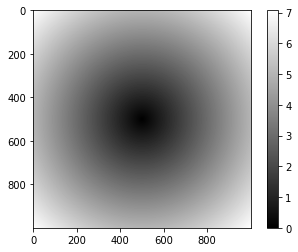

In [178]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

## Expressing Conditional Logic as Array Operations

<b>The numpy.where function is a vectorized version of the ternary expression x if con dition else y. Suppose we had a boolean array and two arrays of values:

In [179]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [180]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [181]:
cond = np.array([True, False, True, True, False])

<b>Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr. A list comprehension doing this might look like:

In [182]:
result = [(x if c else y)
         for x, y, c in zip(xarr, yarr, cond)]

In [183]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With np.where you can write this very concisely:

In [184]:
result = np.where(cond, xarr, yarr)

In [185]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [186]:
arr = np.random.randn(4, 4)

In [187]:
arr

array([[ 0.25668009,  0.65974013, -0.17928972, -0.27099902],
       [ 0.1086792 , -0.31891134, -1.04290807, -0.93194574],
       [-0.31338422,  0.04930786, -0.97856899, -0.01250163],
       [-0.5575032 , -1.56477774, -0.76301415,  0.12571624]])

In [188]:
arr > 0

array([[ True,  True, False, False],
       [ True, False, False, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [189]:
np.where(arr >0, 2, -2)

array([[ 2,  2, -2, -2],
       [ 2, -2, -2, -2],
       [-2,  2, -2, -2],
       [-2, -2, -2,  2]])

<b>You can combine scalars and arrays when using np.where. For example, I can replace all positive values in arr with the constant 2 like so:

In [190]:
np.where(arr>0, 2, arr)

array([[ 2.        ,  2.        , -0.17928972, -0.27099902],
       [ 2.        , -0.31891134, -1.04290807, -0.93194574],
       [-0.31338422,  2.        , -0.97856899, -0.01250163],
       [-0.5575032 , -1.56477774, -0.76301415,  2.        ]])

The arrays passed to np.where can be more than just equal-sized arrays or scalars.

## Mathematical and Statistical Methods

In [191]:
arr = np.random.randn(5, 4)

In [192]:
arr

array([[-0.60339567, -1.21259039, -1.28850109, -1.53495224],
       [ 0.83458364, -0.35676977, -0.2140294 , -0.08500762],
       [-2.56304518,  0.73855879, -0.29459204, -0.15157998],
       [ 0.74302822,  2.57968834,  0.13295928,  0.54940098],
       [-0.96771178,  0.78572547,  1.00147783, -0.59060242]])

In [193]:
arr.mean()

-0.12486775228373337

In [194]:
np.mean(arr)

-0.12486775228373337

In [195]:
arr.sum()

-2.4973550456746674

In [196]:
arr.mean(axis =1)

array([-1.15985985,  0.04469421, -0.5676646 ,  1.0012692 ,  0.05722227])

In [197]:
arr.sum(axis=0)

array([-2.55654077,  2.53461244, -0.66268542, -1.81274129])

Above: Here, arr.mean(1) means “compute mean across the columns” where arr.sum(0) means “compute sum down the rows.”

<b>Other methods like cumsum and cumprod do not aggregate, instead producing an array of the intermediate results:

In [198]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [199]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

<b>In multidimensional arrays, accumulation functions like cumsum return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [200]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [201]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [202]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [203]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

## Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus, sum is often used as a means of counting True values in a boolean array:

In [204]:
arr = np.random.randn(100)

In [205]:
(arr >0).sum() #number of positive values

45

There are two additional methods, any and all, useful especially for boolean arrays. any tests whether one or more values in an array is True, while all checks if every value is True:

In [206]:
bools = np.array([False, False, True, False])

In [207]:
bools.any()

True

In [208]:
bools.all()

False

These methods also work with non-boolean arrays, where non-zero elements evaluate to True.

## Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in-place with the sort method:

In [210]:
arr = np.random.randn(6)

In [211]:
arr

array([-1.98773148,  0.16581251, -0.24602986,  0.29376343,  1.10524122,
       -1.20107013])

In [212]:
arr.sort()

In [213]:
arr

array([-1.98773148, -1.20107013, -0.24602986,  0.16581251,  0.29376343,
        1.10524122])

You can sort each one-dimensional section of values in a multidimensional array in- place along an axis by passing the axis number to sort:

In [214]:
arr = np.random.randn(5,3)

In [215]:
arr

array([[ 0.12722827,  0.79967203,  0.92824842],
       [-1.59116202, -0.6802671 , -0.14633859],
       [-1.35173359, -1.24952632,  0.07921568],
       [-0.71114355, -0.1950787 , -0.42246672],
       [-0.82202497, -0.59363223,  0.06538548]])

In [216]:
arr.sort(1)

In [217]:
arr

array([[ 0.12722827,  0.79967203,  0.92824842],
       [-1.59116202, -0.6802671 , -0.14633859],
       [-1.35173359, -1.24952632,  0.07921568],
       [-0.71114355, -0.42246672, -0.1950787 ],
       [-0.82202497, -0.59363223,  0.06538548]])

The top-level method np.sort returns a sorted copy of an array instead of modifying the array in-place. A quick-and-dirty way to compute the quantiles of an array is to sort it and select the value at a particular rank:

In [218]:
large_arr = np.random.randn(1000)

In [219]:
large_arr.sort()

In [221]:
large_arr[int(0.5 * len(large_arr))] #5% quantile

0.04919898993650446

## Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. A commonly used one is np.unique, which returns the sorted unique values in an array:

In [223]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [224]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [225]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [226]:
np.unique(ints)

array([1, 2, 3, 4])

In [227]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [228]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [229]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

# 4.4 File Input and Output with Arrays

np.save and np.load are the two workhorse functions for efficiently saving and load‐ ing array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension .npy:

In [230]:
arr = np.arange(10)

In [231]:
np.save('some_array', arr)

In [232]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [233]:
np.savez('array_archive.npz', a=arr, b=arr)

In [234]:
arch = np.load('array_archive.npz')

In [235]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 4.5 Linear Algebra

Linear algebra, like matrix multiplication, decompositions, determinants, and other square matrix math, is an important part of any array library. Unlike some languages like MATLAB, multiplying two two-dimensional arrays with * is an element-wise product instead of a matrix dot product. Thus, there is a function dot, both an array method and a function in the numpy namespace, for matrix multiplication:

In [236]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [237]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [238]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [239]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [240]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [241]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [244]:
np.dot(x, np.ones(3)) # matrix product between a two dimensional array & suitably size one sim. array results in one dim array

array([ 6., 15.])

In [243]:
x @ np.ones(3) # matrix multiplication

array([ 6., 15.])

numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant. These are implemented under the hood via the same industry- standard linear algebra libraries used in other languages like MATLAB and R, such as BLAS, LAPACK, or possibly (depending on your NumPy build) the proprietary Intel MKL (Math Kernel Library):

In [245]:
from numpy.linalg import inv, qr

In [246]:
X = np.random.randn(5,5)

In [247]:
mat = X.T.dot(X)

In [248]:
inv(mat)

array([[ 0.24572379, -0.03678359,  0.04618029,  0.21194534,  0.04555142],
       [-0.03678359,  1.74688501, -0.76614218, -1.09660273,  0.40492985],
       [ 0.04618029, -0.76614218,  0.71077469,  0.43257283, -0.18064673],
       [ 0.21194534, -1.09660273,  0.43257283,  1.35251732, -0.19637969],
       [ 0.04555142,  0.40492985, -0.18064673, -0.19637969,  0.18692903]])

In [249]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -8.03751293e-17,  1.37915275e-17,
        -1.36666442e-16, -1.08153753e-17],
       [ 2.77022086e-17,  1.00000000e+00,  3.21234853e-17,
        -5.60947712e-16,  2.51281901e-16],
       [ 9.89884270e-19, -8.02301394e-16,  1.00000000e+00,
         1.18293282e-16, -4.50892283e-17],
       [ 2.25362687e-17, -7.34967915e-16,  3.31041515e-16,
         1.00000000e+00,  2.05104232e-18],
       [-1.44699699e-17, -3.39084009e-16, -1.99734708e-16,
         5.17277769e-16,  1.00000000e+00]])

In [250]:
q, r = qr(mat)

In [251]:
r

array([[-6.62241436,  0.03242348,  1.19072218,  1.81251113,  6.6214756 ],
       [ 0.        , -4.62162864, -1.67999873, -2.01995182,  9.79999207],
       [ 0.        ,  0.        , -2.45535008,  0.32910478, -4.02357441],
       [ 0.        ,  0.        ,  0.        , -1.07646461, -3.22267136],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.91676495]])

# 4.6 Pseudorandom Number Generation

In [252]:
samples = np.random.normal(size=(4, 4))

In [253]:
samples

array([[ 0.1716751 ,  1.62094103, -1.07620215,  0.26889381],
       [-0.37847727,  0.38092428, -0.27176187,  1.28906307],
       [-0.38069526, -0.67206824, -0.00444422, -0.34051517],
       [ 0.33621217,  1.50228866, -0.07524817,  1.96277462]])

In [254]:
from random import normalvariate

In [255]:
N = 1000000

In [256]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.04 s ± 78.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [257]:
%timeit np.random.normal(size=N)

33 ms ± 507 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [258]:
np.random.seed(1234)

In [259]:
rng = np.random.RandomState(1234)

In [260]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# 4.7 Example: Random Walks

In [263]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

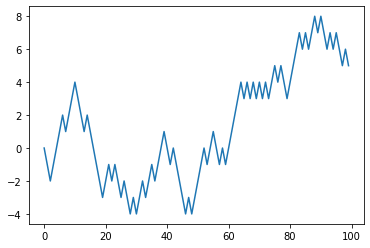

In [265]:
plt.plot(walk[:100])

You might make the observation that walk is simply the cumulative sum of the ran‐ dom steps and could be evaluated as an array expression. Thus, I use the np.random module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:

In [266]:
nsteps = 1000

In [267]:
draws = np.random.randint(0, 2, size=nsteps)

In [268]:
steps = np.where(draws > 0, 1, -1)

In [269]:
walk = steps.cumsum()

From this we can begin to extract statistics like the minimum and maximum value along the walk’s trajectory:

In [270]:
walk.min()

-9

In [271]:
walk.max()

60

In [272]:
(np.abs(walk) >= 10).argmax()

297

## Simulating Many Random Walks at Once

If your goal was to simulate many random walks, say 5,000 of them, you can generate all of the random walks with minor modifications to the preceding code. If passed a 2-tuple, the numpy.random functions will generate a two-dimensional array of draws, and we can compute the cumulative sum across the rows to compute all 5,000 ran‐ dom walks in one shot:

In [273]:
nwalks = 5000

In [274]:
nsteps = 1000

In [275]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) #0 or 1

In [276]:
steps = np.where(draws > 0, 1, -1)

In [277]:
walks = steps.cumsum(1)

In [278]:
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

Now, we can compute the maximum and minimum values obtained over all of the walks:

In [279]:
walks.max()

122

In [280]:
walks.min()

-128

Out of these walks, let’s compute the minimum crossing time to 30 or –30. This is slightly tricky because not all 5,000 of them reach 30. We can check this using the any method:

In [281]:
hits30 = (np.abs(walks) >= 30).any(1)

In [282]:
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [283]:
hits30.sum() #Number that hits 30 or -30

3368

We can use this boolean array to select out the rows of walks that actually cross the
absolute 30 level and call argmax across axis 1 to get the crossing times:

In [284]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [285]:
crossing_times.mean()

509.99762470308787